Moving Averages are used to analyze the time-series data by calculating a series of averages of the different subsets of full dataset.

The simple moving average = (sum of the an asset price over the past n periods) / (number of periods)


EMA [today] = (α x Price [today] ) + ((1 — α) x EMA [yesterday] )
Where:
α = 2/(N + 1)
N = the length of the window (moving average period)
EMA [today] = the current EMA value
Price [today] = the current closing price
EMA [yesterday] = the previous EMA value

In [1]:
import pandas_datareader.data as web
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
start = datetime.datetime(2014, 1, 1) 
end = datetime.datetime(2020, 12, 31) 
# extract the closing price data
visa_df = web.DataReader(['V'], 'yahoo', start = start, end = end)['Close']
visa_df.columns = {'Close Price'}
visa_df.head(10)

,Close Price
Date,
2014-01-02,55.252499
2014-01-03,55.290001
2014-01-06,54.957500
2014-01-07,55.377499
2014-01-08,55.555000
2014-01-09,55.477501
2014-01-10,55.282501
2014-01-13,54.724998
2014-01-14,55.662498


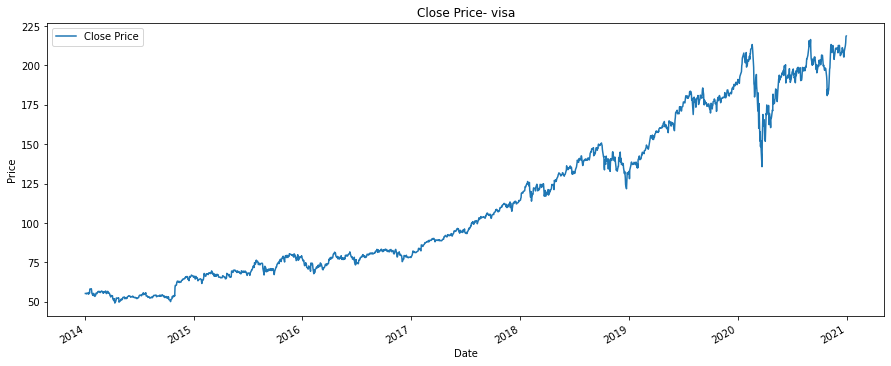

In [3]:
visa_df[['Close Price']].plot(figsize=(15,6))
plt.title('Close Price- visa')
plt.ylabel('Price')
plt.show()

In [4]:
 #20 days SMA
visa_df['20_SMA'] = visa_df['Close Price'].rolling(window = 20, min_periods = 1).mean()
# create 50 days SMA
visa_df['50_SMA'] = visa_df['Close Price'].rolling(window = 50, min_periods = 1).mean()
visa_df.head()

,Close Price,20_SMA,50_SMA
Date,,,
2014-01-02,55.252499,55.252499,55.252499
2014-01-03,55.290001,55.271250,55.271250
2014-01-06,54.957500,55.166667,55.166667
2014-01-07,55.377499,55.219375,55.219375
2014-01-08,55.555000,55.286500,55.286500


In [5]:
visa_df['Signal'] = 0.0
visa_df['Signal'] = np.where(visa_df['20_SMA'] > visa_df['50_SMA'], 1.0, 0.0)

In [6]:
visa_df['Position'] = visa_df['Signal'].diff()
# display first few rows
visa_df.head()

,Close Price,20_SMA,50_SMA,Signal,Position
Date,,,,,
2014-01-02,55.252499,55.252499,55.252499,0.0,NaN
2014-01-03,55.290001,55.271250,55.271250,0.0,0.0
2014-01-06,54.957500,55.166667,55.166667,0.0,0.0
2014-01-07,55.377499,55.219375,55.219375,0.0,0.0
2014-01-08,55.555000,55.286500,55.286500,0.0,0.0


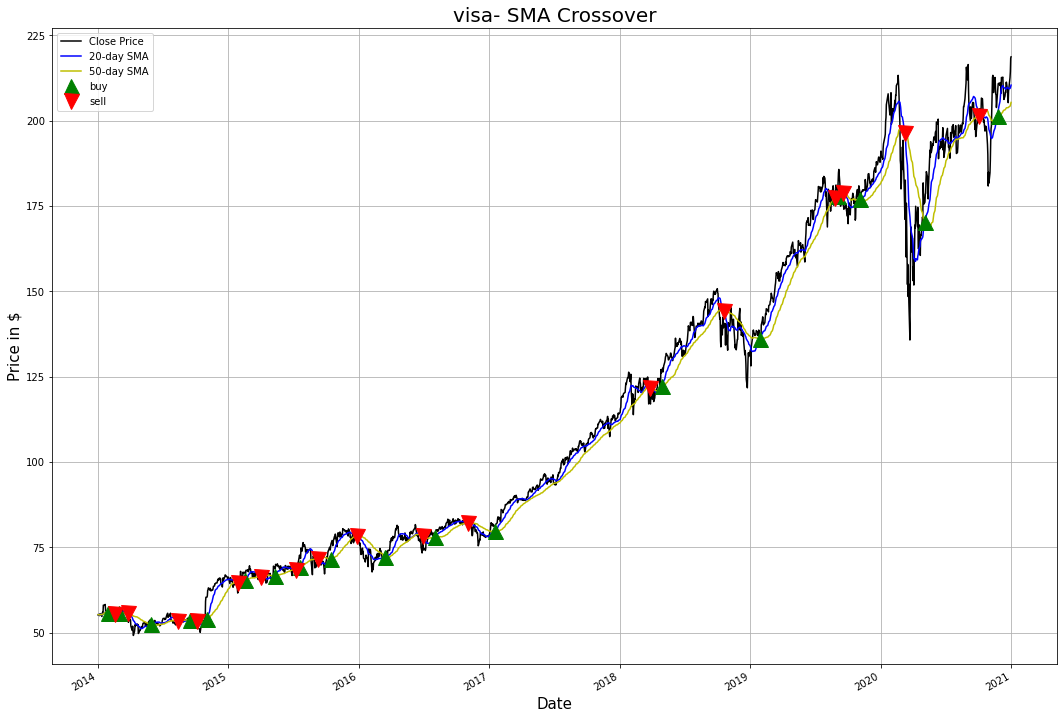

In [7]:
plt.figure(figsize = (18,13))
# plot close price, short-term and long-term moving averages 
visa_df['Close Price'].plot(color = 'k', label= 'Close Price') 
visa_df['20_SMA'].plot(color = 'b',label = '20-day SMA') 
visa_df['50_SMA'].plot(color = 'y',label = '50-day SMA')
# plot ‘buy’ signals
plt.plot(visa_df[visa_df['Position'] == 1].index, 
         visa_df['20_SMA'][visa_df['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
# plot ‘sell’ signals
plt.plot(visa_df[visa_df['Position'] == -1].index, 
         visa_df['20_SMA'][visa_df['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price in $', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('visa- SMA Crossover', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [8]:
visa_df['20_EMA'] = visa_df['Close Price'].ewm(span = 20, adjust = False).mean()
# Create 50 days exponential moving average column
visa_df['50_EMA'] = visa_df['Close Price'].ewm(span = 50, adjust = False).mean()

In [9]:
# create a new column 'Signal' such that if 20-day EMA is greater   # than 50-day EMA then set Signal as 1 else 0 
visa_df['Signal'] = 0.0  
visa_df['Signal'] = np.where(visa_df['20_EMA'] > visa_df['50_EMA'], 1.0, 0.0)

In [10]:
visa_df['Position'] = visa_df['Signal'].diff()


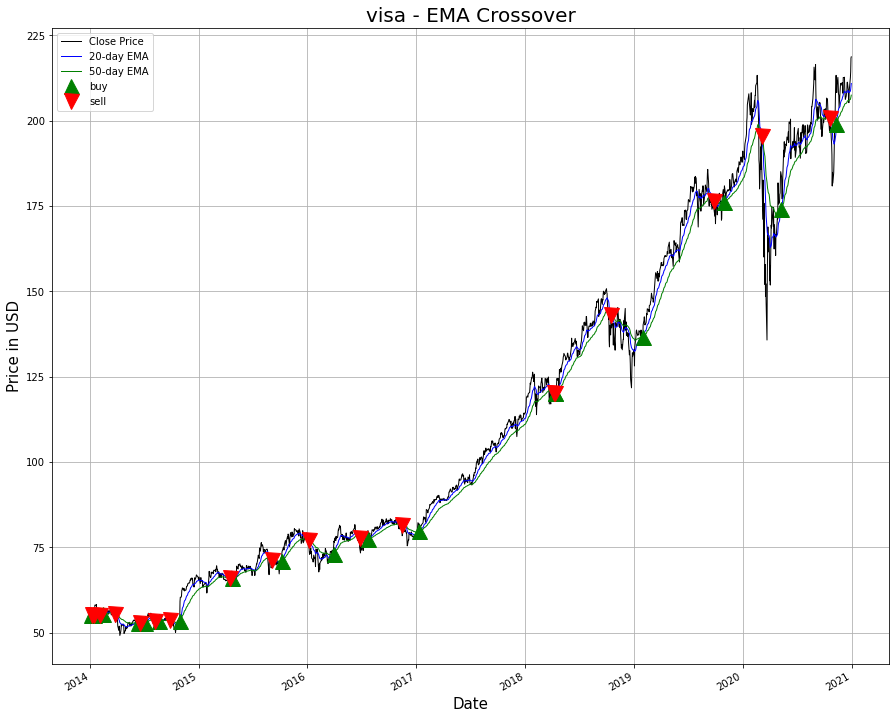

In [11]:
plt.figure(figsize = (15,13))
visa_df['Close Price'].plot(color = 'k', lw = 1, label = 'Close Price')  
visa_df['20_EMA'].plot(color = 'b', lw = 1, label = '20-day EMA') 
visa_df['50_EMA'].plot(color = 'g', lw = 1, label = '50-day EMA')
plt.plot(visa_df[visa_df['Position'] == 1].index, 
         visa_df['20_EMA'][visa_df['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
plt.plot(visa_df[visa_df['Position'] == -1].index, 
         visa_df['20_EMA'][visa_df['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price in USD', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('visa - EMA Crossover', fontsize = 20)
plt.legend()
plt.grid()
plt.show()
